                                                     TASK -03
    
Build a decision tree classifier to predict whether a customer will purchase a product/service based on demographic and behavioral data.



Step 1: Import Required Libraries



In [41]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [43]:
df = pd.read_csv('bank-full.csv', sep=';') 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Step 2: Exploratory Data Analysis (EDA) and Preprocessing

In [44]:
#1)Understand the Data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [45]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [46]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [47]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [48]:
#Handle Categorical Features:

categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [49]:
#Apply One-Hot Encoding:

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


Step 3: Define Features (X) and Target (y)

In [50]:
y = df['y']          
X = df.drop('y', axis=1)

print(f"\nShape of X (features) before one-hot encoding: {X.shape}")
print(f"Shape of y (target): {y.shape}")
print("\nFirst 5 rows of X (before one-hot encoding):")
print(X.head())


Shape of X (features) before one-hot encoding: (45211, 16)
Shape of y (target): (45211,)

First 5 rows of X (before one-hot encoding):
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  
0  unknown    5   may       261         1     -1         0  unknown  
1  unknown    5   may       151         1     -1         0  unknown  
2  unknown    5   may        76         1     -1         0  unknown  
3  unknown    5   may        92         1     -1         0  unknown  
4  unknown    5   may       198         1     -1         0  unknown  

In [51]:
# One-Hot Encode Categorical Features in X
print("\n--- One-Hot Encoding Categorical Features in X ---")
categorical_cols_X = X.select_dtypes(include='object').columns.tolist()
print("Categorical features identified in X:", categorical_cols_X)


--- One-Hot Encoding Categorical Features in X ---
Categorical features identified in X: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [52]:
X_encoded = pd.get_dummies(X, columns=categorical_cols_X, drop_first=True)
print(f"\nShape of X_encoded (features after one-hot encoding): {X_encoded.shape}")
print("First 5 rows of X_encoded:")
print(X_encoded.head())
print("\nStep 3: Data Preprocessing complete.\n")



Shape of X_encoded (features after one-hot encoding): (45211, 42)
First 5 rows of X_encoded:
   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   58     2143    5       261         1     -1         0            False   
1   44       29    5       151         1     -1         0            False   
2   33        2    5        76         1     -1         0            False   
3   47     1506    5        92         1     -1         0             True   
4   33        1    5       198         1     -1         0            False   

   job_entrepreneur  job_housemaid  ...  month_jul  month_jun  month_mar  \
0             False          False  ...      False      False      False   
1             False          False  ...      False      False      False   
2              True          False  ...      False      False      False   
3             False          False  ...      False      False      False   
4             False          False  ...      False      F

Step 4: Split the Data into Training and Testing Sets

In [53]:
# Step 4: Split the Data into Training and Testing Sets

print("Step 4: Splitting data into training and testing sets.")
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,          # Features (one-hot encoded)
    y,                  # Target variable (numerical)
    test_size=0.3,      # 30% for testing
    random_state=42,    # For reproducible results
    stratify=y          # Maintain class distribution
)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}\n")

Step 4: Splitting data into training and testing sets.
Training set shape: X_train=(31647, 42), y_train=(31647,)
Testing set shape: X_test=(13564, 42), y_test=(13564,)



In [54]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix


In [55]:


print("Step 5: Building and training the Decision Tree Classifier.")

dtree = DecisionTreeClassifier(random_state=42, max_depth=3) # <--- CHANGE MADE HERE
dtree.fit(X_train, y_train)
print("Decision Tree Classifier trained successfully.\n")




Step 5: Building and training the Decision Tree Classifier.
Decision Tree Classifier trained successfully.



Step 6: Making predictions and evaluating the model.
Accuracy Score: 0.9011

Classification Report:
                 precision    recall  f1-score   support

No Subscription       0.91      0.98      0.95     11977
   Subscription       0.68      0.30      0.41      1587

       accuracy                           0.90     13564
      macro avg       0.79      0.64      0.68     13564
   weighted avg       0.89      0.90      0.88     13564



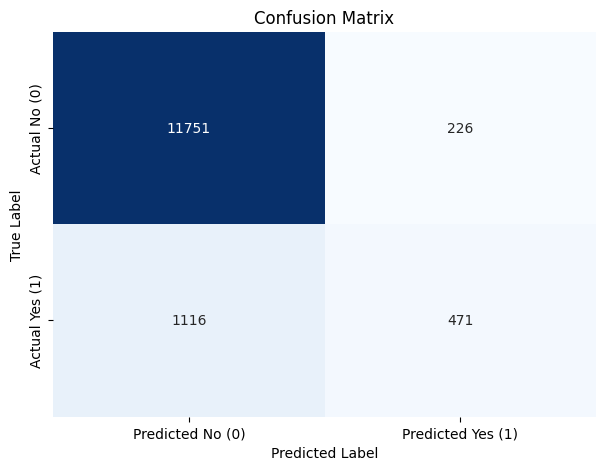


Step 6: Model evaluation complete.



In [56]:
# Step 6: Make Predictions and Evaluate the Model

import numpy as np
import matplotlib.pyplot as plt
print("Step 6: Making predictions and evaluating the model.")
y_pred = dtree.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Subscription', 'Subscription']))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No (0)', 'Predicted Yes (1)'],
            yticklabels=['Actual No (0)', 'Actual Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("\nStep 6: Model evaluation complete.\n")

Step 7: Visualizing the Decision Tree (a new plot window will open).


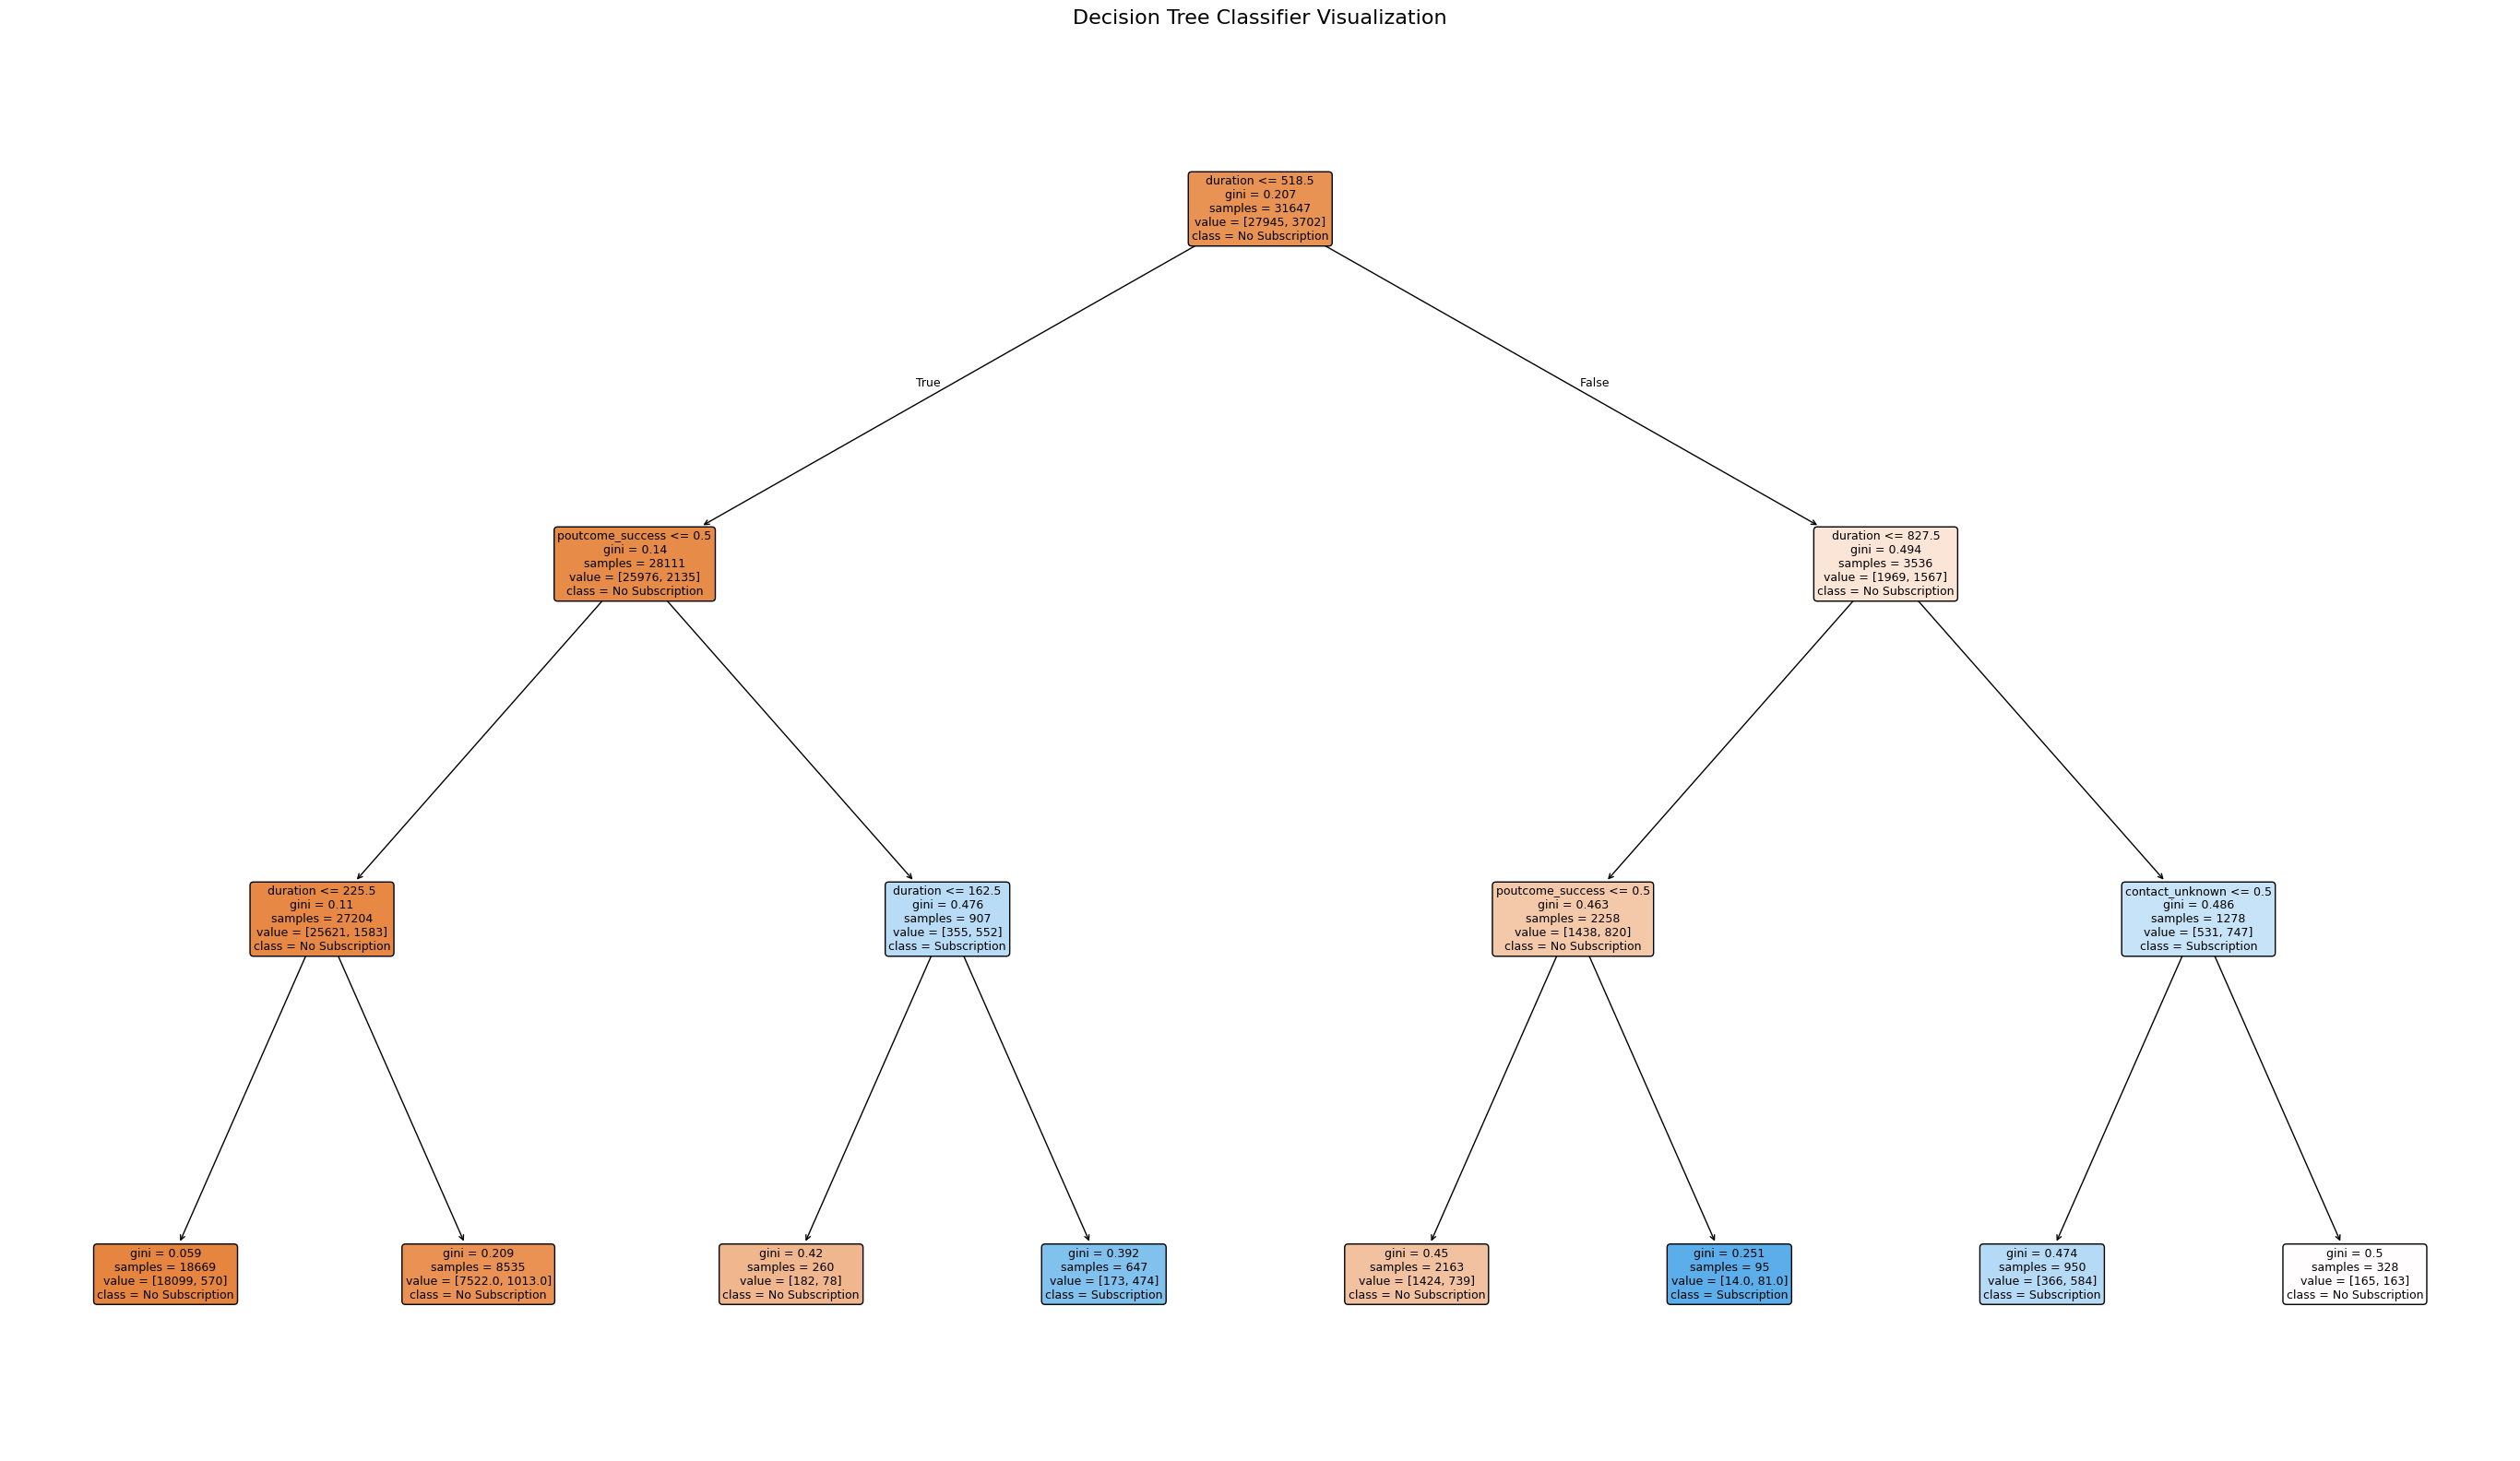


Step 7: Decision Tree visualization complete.

--- Task-03 Final Status: Completed Successfully! ---


In [40]:
# Step 7: Visualize the Decision Tree 
print("Step 7: Visualizing the Decision Tree (a new plot window will open).")
plt.figure(figsize=(35, 20)) 
plot_tree(dtree,
          feature_names=X_encoded.columns.tolist(), 
          class_names=['No Subscription', 'Subscription'], 
          filled=True,   
          rounded=True, 
          fontsize=9)    
plt.title("Decision Tree Classifier Visualization", fontsize=16)
plt.show()
print("\nStep 7: Decision Tree visualization complete.")

print("\n--- Task-03 Final Status: Completed Successfully! ---")